The content of this notebook aligns with the information presented in [Common Voice: A Massively-Multilingual Speech Corpus](https://arxiv.org/pdf/1912.06670). The analysis focuses on the metadata of the clips from the [**Common Voice Corpus 2**](https://commonvoice.mozilla.org/en/datasets) dataset in Spanish.

In [1]:
# Import standard scientific libraries
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import project-specific libraries
import fireducks.pandas as pd # Custom pandas-like library for data manipulation

sns.set_style("darkgrid")

### Validated Data  

The validation of audio clips is performed by the same users who choose to donate voice recordings. For this reason, Mozilla implemented a simple voting system in which audio clips are validated through **up_votes** and **down_votes** (database features). Each clip can receive a maximum of three votes, and its validity is determined by the number of **up_votes** and **down_votes**. Two (or more) **up_votes** classify the audio as valid, while two (or more) **down_votes** classify it as invalid.

In [2]:
validated = pd.read_csv('Dataset/validated.tsv', delimiter='\t')
validated.head(1)

,client_id,path,sentence,up_votes,down_votes,age,gender,accent
0,185e6966447d8ff43fb821e98fcc7ba105109bd4c9c46b...,d943b314c0fc393ea34c5c6db3819b600d5d00ea6a2ce7...,Compramos el mejor vino.,2,0,None,None,None


Firstly, we need to consider the structure of this partition. **Each** partition contains eight features, which are described as follows:

- **client_id** $\rightarrow$ This feature represents the anonymized speaker ID.  
- **path** $\rightarrow$ This feature indicates the "name" of the clip.  
- **sentence** $\rightarrow$ The phrase spoken by the speaker.  
- **up_votes** $\rightarrow$ The number of positive votes given by other speakers.  
- **down_votes** $\rightarrow$ The number of negative votes given by other speakers.  
- **age** $\rightarrow$ The age of the speaker at the time of recording the clip.  
- **gender** $\rightarrow$ The gender of the speaker.  
- **accent** $\rightarrow$ The accent of the speaker.  

In this case, the `validated` partition contains **23,405** rows, each describing an individual recorded clip.

In [3]:
#27128
validated.shape

(23405, 8)

It is possible to observe that, in our sample population, most voice donations come from adults. The teenage and sixties age ranges have contributed fewer voice clips. However, individuals in their twenties represent the group with the highest voice donations, followed by those in their thirties, forties, and fifties, who also show notable participation.  

Additionally, the male gender has contributed more voice clips, while the "other" category represents a minority.

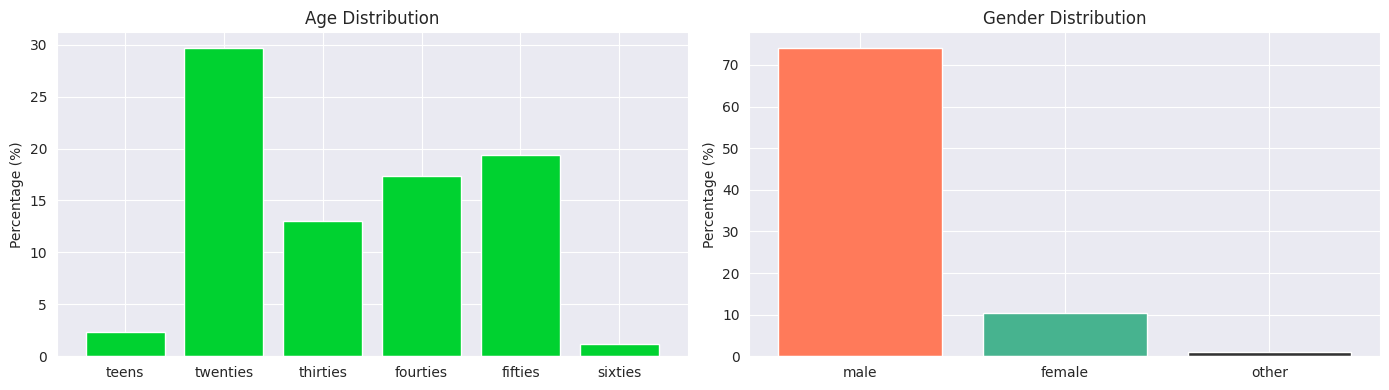

In [46]:
# Order of age groups
age_order = ['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties']

# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 4))

# Plot age distribution in percentage
age_counts = validated['age'].value_counts(normalize=True).reindex(age_order)
ax1.bar(age_order, age_counts.fillna(0) * 100, color='#00D230')
ax1.set_ylabel('Percentage (%)')
ax1.set_title('Age Distribution')

# Plot gender distribution in percentage
gender_counts = validated['gender'].value_counts(normalize=True)
ax2.bar(gender_counts.index, gender_counts * 100, color={'#47B38F','#FF7A5A','#333333'})
ax2.set_ylabel('Percentage (%)')
ax2.set_title('Gender Distribution')

plt.tight_layout()
plt.show()

We can confirm that males are the majority of contributors sending voice clips, regardless of gender. However, this gender imbalance, caused by lower participation from women, could pose a challenge for the dataset's implementation in the future.

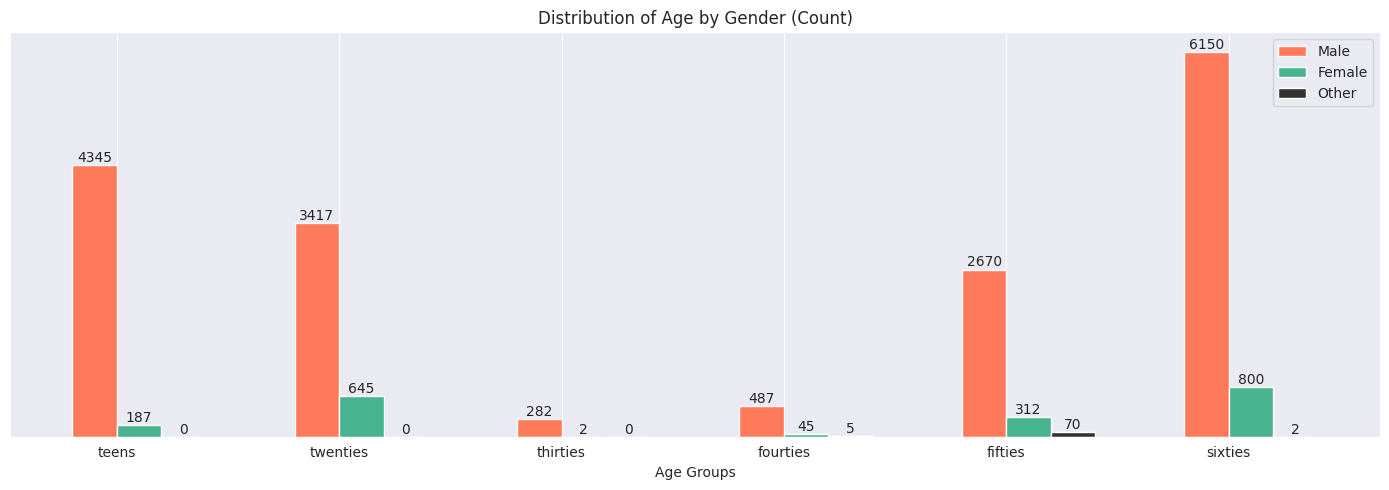

In [40]:
# Filter the dataset for relevant variables
gender_age_data = validated[validated['gender'].isin(['male', 'female', 'other'])]

# Calculate counts for each gender and age group
gender_counts = gender_age_data.groupby(['gender', 'age'])['age'].count().unstack().T.fillna(0)

# Create the figure and axes (2 rows, 1 column)
fig, ax1 = plt.subplots(figsize=(14, 5))  # Only one subplot now

# Bar width and x_positions
bar_width = 0.2
x_positions = range(len(age_order))

# Plot counts on the first axis (ax1)
for i, gender in enumerate(['male', 'female', 'other']):
    if gender == 'female': color = '#47B38F'
    elif gender == 'male': color ='#FF7A5A'
    else: color ='#333333'
    
    bars = ax1.bar(
        [x + (i - 0.5) * bar_width for x in x_positions],
        gender_counts[gender],
        width=bar_width,
        color=color,
        label=gender.capitalize()
    )

    # Add count labels above each bar
    for bar in bars:
        yval = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width() / 2, yval + 1,  # Positioning the label above the bar
            f'{int(yval)}',  # Format the label as a count
            ha='center', va='bottom', fontsize=10  # Horizontal and vertical alignment
        )

# Set x-ticks and labels
ax1.set_xticks(x_positions)
ax1.set_xticklabels(age_order)
ax1.set_xlabel('Age Groups')  # Only x-label remains

# Set title
ax1.set_title('Distribution of Age by Gender (Count)')

# Disable Y axis
ax1.get_yaxis().set_visible(False)

# Add legend
ax1.legend(loc='upper right')

# Adjust layout to avoid overlap
plt.tight_layout()

plt.show()


It is evident that approximately **30%** of Spanish speakers in the dataset belong to the **Northern Peninsular** region. Similarly, there is an approximate proportion of **12%** from the Andean region, which could reflect a generalization of various accents, such as Tolimense, Antioqueño, Boyacense, among others. The remaining regions individually represent less than **10%** each.  

**Note:** I am not an expert in geography, but I assume that in all regions, a variety of accents among speakers is implicitly present.

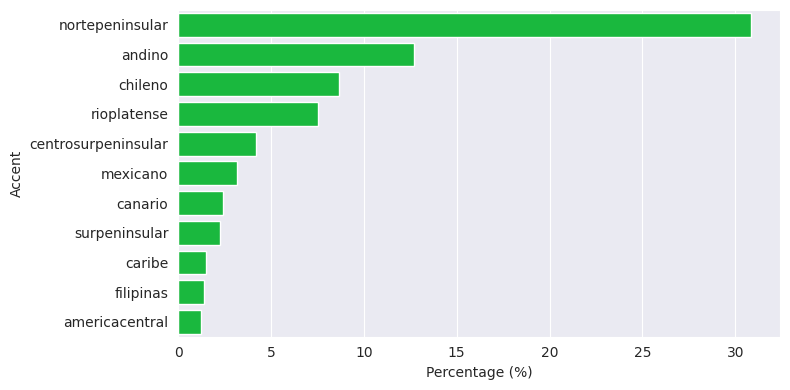

In [47]:
# Calcular porcentajes y ordenar en orden descendente
accent_counts = validated['accent'].value_counts(normalize=True).reset_index()
accent_counts.columns = ['accent', 'percentage']
accent_counts['percentage'] *= 100  # Convertir a porcentaje

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 4))  # Ajustar ancho y altura

sns.barplot(
    y='accent',
    x='percentage',
    data=accent_counts,
    color='#00D230'
)

# Agregar etiquetas
ax.set_xlabel('Percentage (%)')
ax.set_ylabel('Accent')
plt.tight_layout()
plt.show()

Despite having high proportions of missing values, they are not considered problematic. In the case of the `age` variable, I am uncertain whether an increase in age effectively generalizes voice synthesis. Regarding the `gender` variable, it is evident that in **84%** of the available data, the majority of speakers are male. Therefore, it is essential to verify the distributions in the ***train*** and ***test*** datasets.  

Similarly, the `accent` variable shows that in **76%** of the available data, more than **30%** of the speakers belong to the **Northern Peninsular** region. The other regions do not individually hold significant proportions. However, this higher proportion might introduce challenges in the generalization of voice synthesis concerning accent variation.

In [22]:
validated.isnull().sum() / validated.shape[0] * 100

client_id      0.000000
path           0.000000
sentence       0.000000
up_votes       0.000000
down_votes     0.000000
age           16.996368
gender        14.492630
accent        24.071780
dtype: float64